In [2]:
from dataset_utils import show_lozenge
import torch
import numpy as np
import model.model as arch
import matplotlib.pyplot as plt


In [3]:
## Need path to state dictionary
state_path = 'delta_test/model_best.pth'

In [4]:

net = arch.LocalizationModel()
net.load_state_dict(torch.load(state_path)['state_dict'])

<All keys matched successfully>

In [5]:
images_test = np.load('data_loader/data/red_lozenges/images_test.npy')
centers_test = np.load('data_loader/data/red_lozenges/centers_test.npy')
scales_test = np.load('data_loader/data/red_lozenges/scales_test.npy')
rots_test = np.load('data_loader/data/red_lozenges/rots_test.npy')
labels_test = np.column_stack([centers_test, scales_test, rots_test])

In [6]:
labels_test.shape
#plt.imshow(images_test[0])

(10000, 4)

In [18]:
offset_pred =labels_test[0] - net(torch.tensor(np.transpose(images_test[0],(2,0,1))).unsqueeze_(0).float()).detach().numpy()

In [19]:
labels_pred = net(torch.tensor(np.transpose(images_test[1:17],(0,3,1,2))).float()).detach().numpy() + offset_pred

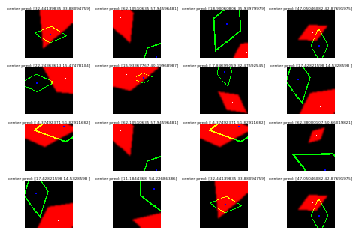

In [20]:
show_lozenge(images_test[1:17],labels_test[1:17], targets_pred = labels_pred[1:17])